### 小波分解
一个信号的多种频率分析，得到不同的频率分量，就是原信号中不同频率的信号

小波波分解重构的过程
- 选择小波（TBD）
- 将信号进行小波分解（需要确定小波分解的最大层级：由已知小波类型和被分解的信号长度确定），得到小波层系数
- 重构信号（通过将其他层的参数都变为0，再进行重构得到对应层的小波分量信号）


<class 'list'>
7
<class 'numpy.ndarray'>
(30,)


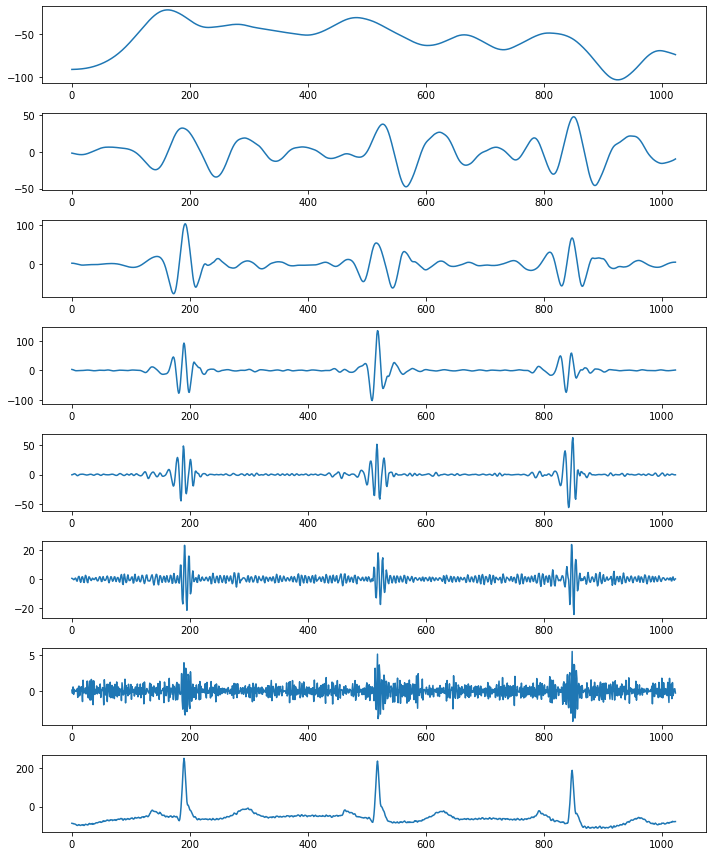

In [8]:
import matplotlib.pyplot as plt
import pywt
import numpy as np

# 生成心电信号
ecg = pywt.data.ecg()

# 选用Daubechies8小波
w = pywt.Wavelet('db8')

# 已知小波类型和被分解的信号长度之后，可以确定小波分解的最大层级
maxlev = pywt.dwt_max_level(len(ecg), w.dec_len)

# 将信号进行小波分解，得到小波层系数
coeffs = pywt.wavedec(ecg, 'db8', level=maxlev)
print (type(coeffs))
print (len(coeffs))
print (type(coeffs[0]))
print (coeffs[0].shape)

# 将信号进行小波重构
datarec = pywt.waverec(coeffs, 'db8')

# 控制小波层系数，得到各频率的小波重构
datarec1 = pywt.waverec(np.multiply(np.array(coeffs, dtype=object), np.array([1, 0, 0, 0, 0, 0, 0], dtype=object)).tolist(), 'db8')
datarec2 = pywt.waverec(np.multiply(np.array(coeffs, dtype=object), np.array([0, 1, 0, 0, 0, 0, 0], dtype=object)).tolist(), 'db8')
datarec3 = pywt.waverec(np.multiply(np.array(coeffs, dtype=object), np.array([0, 0, 1, 0, 0, 0, 0], dtype=object)).tolist(), 'db8')
datarec4 = pywt.waverec(np.multiply(np.array(coeffs, dtype=object), np.array([0, 0, 0, 1, 0, 0, 0], dtype=object)).tolist(), 'db8')
datarec5 = pywt.waverec(np.multiply(np.array(coeffs, dtype=object), np.array([0, 0, 0, 0, 1, 0, 0], dtype=object)).tolist(), 'db8')
datarec6 = pywt.waverec(np.multiply(np.array(coeffs, dtype=object), np.array([0, 0, 0, 0, 0, 1, 0], dtype=object)).tolist(), 'db8')
datarec7 = pywt.waverec(np.multiply(np.array(coeffs, dtype=object), np.array([0, 0, 0, 0, 0, 0, 1], dtype=object)).tolist(), 'db8')

# datarec1 = pywt.waverec(np.multiply(coeffs,[1, 0, 0, 0, 0, 0, 0]).tolist(), 'db8') # 将信号进行小波重构
# datarec2 = pywt.waverec(np.multiply(coeffs,[0, 1, 0, 0, 0, 0, 0]).tolist(), 'db8') # 将信号进行小波重构
# datarec3 = pywt.waverec(np.multiply(coeffs,[0, 0, 1, 0, 0, 0, 0]).tolist(), 'db8') # 将信号进行小波重构
# datarec4 = pywt.waverec(np.multiply(coeffs,[0, 0, 0, 1, 0, 0, 0]).tolist(), 'db8') # 将信号进行小波重构
# datarec5 = pywt.waverec(np.multiply(coeffs,[0, 0, 0, 0, 1, 0, 0]).tolist(), 'db8') # 将信号进行小波重构
# datarec6 = pywt.waverec(np.multiply(coeffs,[0, 0, 0, 0, 0, 1, 0]).tolist(), 'db8') # 将信号进行小波重构
# datarec7 = pywt.waverec(np.multiply(coeffs,[0, 0, 0, 0, 0, 0, 1]).tolist(), 'db8') # 将信号进行小波重构

plt.figure(figsize=(10, 12))
plt.subplot(8, 1, 1)
plt.plot(datarec1)
plt.subplot(8, 1, 2)
plt.plot(datarec2)
plt.subplot(8, 1, 3)
plt.plot(datarec3)
plt.subplot(8, 1, 4)
plt.plot(datarec4)
plt.subplot(8, 1, 5)
plt.plot(datarec5)
plt.subplot(8, 1, 6)
plt.plot(datarec6)
plt.subplot(8, 1, 7)
plt.plot(datarec7)
plt.subplot(8, 1, 8)
plt.plot(datarec)

plt.tight_layout()
plt.show()

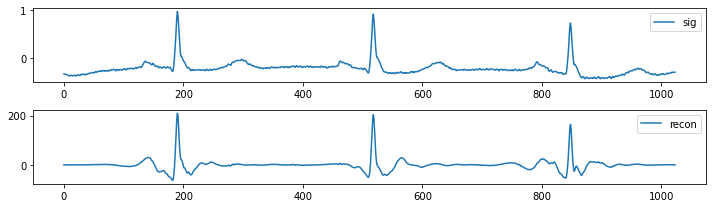

In [13]:
datarec_band = pywt.waverec(np.multiply(np.array(coeffs, dtype=object), np.array([0, 0, 1, 1, 1, 1, 0], dtype=object)).tolist(), 'db8')

plt.figure(figsize=(10, 3))
plt.subplot(2,1,1)
plt.plot(ecg)
# plt.plot(datarec)
plt.legend(['sig', 'recon'])
plt.subplot(2,1,2)
# plt.plot(ecg)
plt.plot(datarec_band)
plt.legend(['recon', 'band'])

plt.tight_layout()
plt.show()


### 小波滤波
- 每一层的系数都稍微改一点然后再重构回去（threshold用法TBD）
- 在skimage.restoration库中还有denoise_wavelet函数可以直接滤波

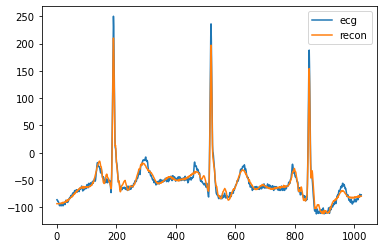

In [10]:
threshold = 0.1

for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold * max(coeffs[i]))

datarec = pywt.waverec(coeffs=coeffs, wavelet='db8')

plt.figure()
plt.plot(ecg)
plt.plot(datarec)
plt.legend(['ecg', 'recon'])
plt.show()

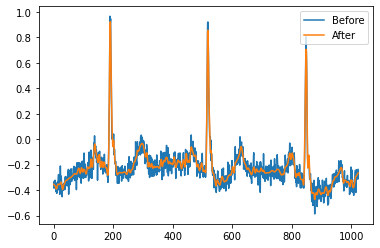

In [11]:
from skimage.restoration import denoise_wavelet

# change dtype from int32 to float64, seems unneccessary
# ecg = pywt.data.ecg().astype(float) / 256
ecg = pywt.data.ecg() / 256

#给信号加上高斯噪声
sigma = 0.05
ecg_noisy = ecg + sigma * np.random.randn(ecg.size)

ecg_denoise = denoise_wavelet(ecg_noisy, method='BayesShrink', mode='soft', wavelet_levels=maxlev, wavelet='db8', rescale_sigma=False)

plt.plot(ecg_noisy)
plt.plot(ecg_denoise)
plt.legend(['Before','After'])
plt.show()